In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
df = pd.read_pickle('train.pickle')

In [16]:
x = df['features'].reshape(df['features'].shape[0], -1)
y = df['labels']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [20]:
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy, recall, f1)

0.9554597701149425 0.946670732889505 0.9498390085508316


В силу специфики задачи я бы использовал recall или f1, тк нам важнее правильно распознать знак, а не распознать все
В дальнейшем буду использовать f1 меру

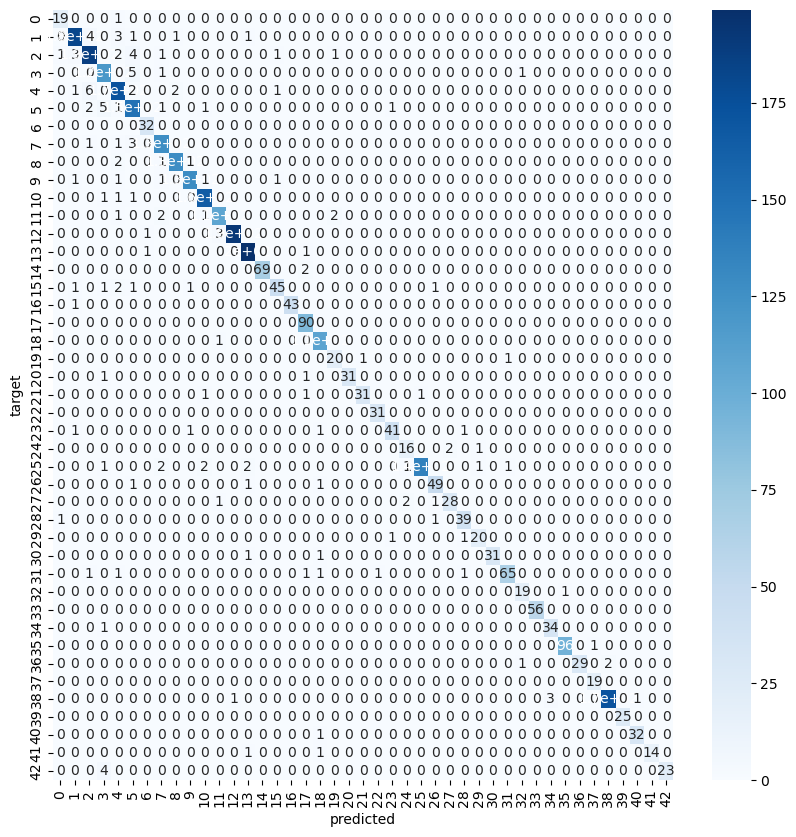

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('target')
plt.show()

In [49]:
n = 4
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        if i != j and conf_matrix[i][j] > n:
            print(f'Sign {i} and {j} often confused, score: {conf_matrix[i][j]:}')

Sign 3 and 5 often confused, score: 5
Sign 4 and 2 often confused, score: 6
Sign 5 and 3 often confused, score: 5


In [56]:
models= {
    'LR': LogisticRegression(max_iter=1000),
    'kNN': KNeighborsClassifier(n_neighbors=3),
    'NB': GaussianNB(),
    'SVC l': SVC(kernel='linear'),
    'SVC p': SVC(kernel='poly'),
    'SVC rbf': SVC(kernel='rbf')
}

res = {}
for name, model in tqdm(models.items(), desc='models tests'):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    res[name] = f1_score(y_test, y_pred, average='macro')
    print(name, res[name])

models tests:  17%|█▋        | 1/6 [02:48<14:00, 168.15s/it]

LR 0.9498390085508316


models tests:  33%|███▎      | 2/6 [02:52<04:46, 71.71s/it] 

kNN 0.9127973620636478


models tests:  50%|█████     | 3/6 [02:54<01:59, 39.90s/it]

NB 0.1983866620776252


models tests:  67%|██████▋   | 4/6 [06:44<03:50, 115.10s/it]

SVC l 0.960371080052884


models tests:  83%|████████▎ | 5/6 [25:51<08:07, 487.22s/it]

SVC p 0.656682669791562


models tests: 100%|██████████| 6/6 [38:44<00:00, 387.47s/it]

SVC rbf 0.8849314517498786


TypeError: get expected at least 1 argument, got 0

In [57]:
best = max(res, key=res.get)
worst = min(res, key=res.get)

print(f'Best model {best}, score {res[best]}')
print(f'Worst model {worst}, score {res[worst]}')

Best model SVC l, score 0.960371080052884
Worst model NB, score 0.1983866620776252


НБК - худшая модель, тк не работает предположение о независимоти признаков, так же мы имеем высокую размерность данных и сложность признакового пространства 